In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tinynn
from tinynn import Dense, BatchNorm, ReLU, Sigmoid, Softmax, Conv, Pool, Flatten, Transpose

%matplotlib inline

In [2]:
# read data
X_train, y_train = tinynn.load_mnist('train')
X_test, y_test = tinynn.load_mnist('test')

In [3]:
# preprocessing
normalize = tinynn.normalizer(X_train, axis=0)

def flatten(X):
    return X.reshape((X.shape[0], -1))

Xs, Ys = tinynn.partition(X_train, y_train, axis=0, size=1000)

In [4]:
normalize(Xs[0]).shape

(1000, 28, 28)

In [5]:
Xs[0].shape

(1000, 28, 28)

In [6]:
Ys[0].shape

(1000,)

In [7]:
fc_network = tinynn.Network(Dense(28*28, 100, bias=False), BatchNorm(100), ReLU(),
                            Dense(100, 10, bias=False), BatchNorm(10), Softmax(),
                            x_preprocess=lambda x: flatten(normalize(x)),
                            y_preprocess=tinynn.onehot,
                            postprocess=lambda x: np.argmax(x, axis=1))

In [8]:
fc_network.train(Xs, Ys, niter=20,
                 opt_type=tinynn.ADAM, opt_params={'α': 0.0005})

100%|██████████| 20/20 [00:25<00:00,  1.28s/it, cost=0.181]


Text(0.5,0,'iteration')

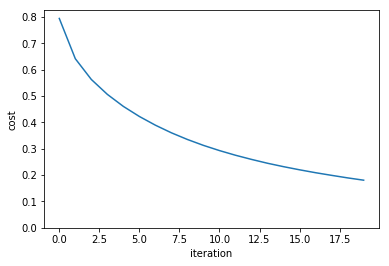

In [9]:
# show training cost
plt.plot(fc_network.costs)
plt.ylim(ymin=0.0)
plt.ylabel("cost")
plt.xlabel("iteration")

In [10]:
# Validate
for l in fc_network.layers:
    l.active = False

for key, X, Y in [('train', X_train, y_train),
                  ('test', X_test, y_test)]:
    print(key, 'set')
    predictions = fc_network.predict(X)
    print("Truth:     ", Y[:30])
    print("Prediction:", predictions[:30])

    correct = (predictions == Y).mean()
    print("Correct: {:6.2f}%\n".format(100.0 * correct))

train set
Truth:      [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
Prediction: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 3 2 4 3 2 7]
Correct:  98.22%

test set
Truth:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1]
Correct:  96.77%



## Conv network

In [ ]:
network.predict(Xs[0][0:10, ...]).shape

In [ ]:
conv = Conv(1, 10, (3, 3), stride=(1, 1))
%time conv(Xs[0][..., None])

In [ ]:
# preprocessing
normalize = tinynn.normalizer(X_train[..., None], axis=0)

def flatten(X):
    return X.reshape((X.shape[0], -1))

Xs, Ys = tinynn.partition(X_train, y_train, axis=0, size=1000)

In [ ]:
# Define network
network = tinynn.Network(Conv(1, 10, (3, 3), stride=(1, 1)), ReLU(), # 14
                         Pool((2, 2), stride=(2, 2)), 
                         Conv(10, 20, (3, 3), stride=(2, 2)), ReLU(),
                         Pool((2, 2), stride=(2, 2)),  
                         #Flatten(),
                         x_preprocess=lambda X: normalize(X[..., None]),
                         y_preprocess=tinynn.onehot)
                         #postprocess=lambda x: np.argmax(x, axis=0))